# **Assignment \#4**: Machine Learning MC886/MO444
University of Campinas (UNICAMP), Institute of Computing (IC)

Prof. Sandra Avila, 2022s2

In [1]:
# TODO: RA & Name 

## Objective

Exploring **unsupervised learning techniques** by using dimensionality reduction techniques.

## Import Libraries

In [ ]:
# Libraries are free to use! You can use Scikit-learn, Keras/TensorFlow, PyTorch, ... 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
import torchvision
import pandas as pd
import tensorflow as tf
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Dense,Flatten,Dropout,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D,GlobalAveragePooling2D
from keras.applications import MobileNetV2,InceptionResNetV2,VGG16
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array,array_to_img,load_img
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape

## Dataset

Fashion-MNIST is a dataset of Zalando’s article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28×28 grayscale image, associated with a label from 10 classes.

Dataset Information:

- You should respect the following traininig/test split: 60,000 training examples, and 10,000 test examples. Avoid overfitting.

- The data is available at:
https://www.dropbox.com/s/qawunrav8ri0sp4/fashion-mnist-dataset.zip:
‘train’ folder (fashion-mnist train.csv.zip) + ‘test’ folder (fashion-mnist test.csv.zip).

  - You can also download the data by the framework you are using.

- Each training and test example is assigned to one of the following labels: 0 t-shirt/top, 1 trouser, 2 pullover, 3 dress, 4 coat, 5 sandal, 6 shirt, 7 sneaker, 8 bag, 9 ankle boot.
- Each row is a separate image. Column 1 is the class label. The remaining columns are pixel numbers (784 total). Each value is the darkness of the pixel (1 to 255). Dataset was converted to CSV with this script: https://pjreddie.com/projects/mnist-in-csv.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Download Fashion-MNIST

train = pd.read_csv('/content/drive/MyDrive/Mestrado Unicamp/Trabalho_4/fashion-mnist-dataset/fashion-mnist_train.csv/fashion-mnist_train.csv')
#test = pd.read_csv("/content/drive/MyDrive/Mestrado Unicamp/Trabalho_4/fashion-mnist-dataset/fashion-mnist_test.csv/fashion-mnist_test.csv")

num_classes = 10
x = train.iloc[:,1:]
y_ = train['label']
y = keras.utils.to_categorical(y_, num_classes)

x = x.values.reshape(60000,28,28,1)

#->
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.33, random_state=42)

x_train, y_train = x_train, y_train
x_val, y_val = x_val, y_val

In [ ]:
# label=[]
# for i in y:
#   #print(i.argmax())
#   max = i.argmax()
#   label = np.append(label,max)

# label_plot = label.reshape((60000, 1))
# x_plot = x, label_plot
# x_plot[1][0]

array([2.])

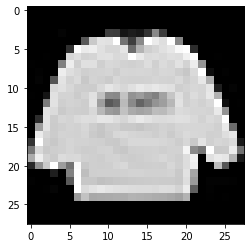

In [ ]:
###Só consegui plotar dessa forma:
img = x[0]
plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
# Plot a data grid for general observation
#->
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(x_train), size=(1,)).item()
    img, label = x_train[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Activities

1. (2 points) Baseline: Explore Convolutional Neural Networks with Fashion-MNIST. What is the accuracy of your CNN model? (1.5 points) Describe your Convolutional Neural Network architecture. (0.5 points) What are your conclusions about the baseline?

In [ ]:
# Set the parameters of the neural network
loss_function = 'categorical_crossentropy'
optimizer = 'adam'

In [ ]:
# Create your convolutional neural network architecture

#Creating CNN model
cnn_model=tf.keras.models.Sequential([
    Conv2D(8,3,activation="relu",input_shape=(28,28,1), padding='same'),
    MaxPooling2D(2,2),
    Conv2D(16,3,activation="relu",padding='same'),
    MaxPooling2D(2,2),
    Conv2D(32,3,activation="relu", padding='same'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(10,activation="softmax")
])

cnn_model.compile(loss = loss_function ,optimizer = optimizer ,metrics = ['accuracy'])

In [ ]:
# Train loop
history1 = cnn_model.fit(x_train,y_train,batch_size = 128,epochs = 10,validation_data = (x_val,y_val))

Epoch 1/10
315/315 [==============================] - 16s 51ms/step - loss: 2.1722 - accuracy: 0.6804 - val_loss: 0.7424 - val_accuracy: 0.7591
Epoch 2/10
315/315 [==============================] - 14s 46ms/step - loss: 0.5697 - accuracy: 0.8112 - val_loss: 0.5216 - val_accuracy: 0.8249
Epoch 3/10
315/315 [==============================] - 14s 46ms/step - loss: 0.4646 - accuracy: 0.8397 - val_loss: 0.4787 - val_accuracy: 0.8335
Epoch 4/10
315/315 [==============================] - 17s 54ms/step - loss: 0.4100 - accuracy: 0.8565 - val_loss: 0.4240 - val_accuracy: 0.8517
Epoch 5/10
315/315 [==============================] - 15s 48ms/step - loss: 0.3792 - accuracy: 0.8664 - val_loss: 0.4080 - val_accuracy: 0.8594
Epoch 6/10
315/315 [==============================] - 14s 46ms/step - loss: 0.3562 - accuracy: 0.8729 - val_loss: 0.3986 - val_accuracy: 0.8576
Epoch 7/10
315/315 [==============================] - 14s 46ms/step - loss: 0.3392 - accuracy: 0.8779 - val_loss: 0.3723 - val_accuracy:

Text(0.5, 0, 'Epochs')

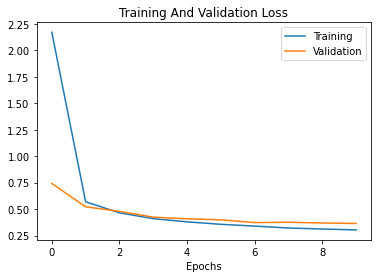

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title("Training And Validation Loss")
plt.xlabel("Epochs")

In [ ]:
# Report your accuracy using convolutional neural network
scores = cnn_model.evaluate(x_val, y_val, verbose=0)
print(scores[1])

0.8716161847114563


In [ ]:
# What are your conclusions about the baseline? 

O primeiro teste foi realizado apenas com 10 epócas e o resultado foi uma acurácia de 0.87, acompanhando o gráfico de perda por epoca, aparentemente sofremos overfitting após a 4 epoca (o erro continua caindo no conjunto de treino e começou a aumentar no conjunto de validação). Poderíamos ter parado na quarta época

2. (2 points) Using PCA: Re-do the first experiment considering the PCA dimensionality reduction. (1.5 points) Consider two different energies (variance) for reducing the image dimensionality. (0.5 points) What are the conclusions when using PCA in this problem? Does the accuracy improve?

In [ ]:
len(x)

60000

In [ ]:
# Run PCA methods
from sklearn.decomposition import PCA
x_pca = train.iloc[:,1:]/255
pca = PCA(n_components=100)
X_r = pca.fit(x_pca).transform(x_pca)

In [ ]:
X_rr = X_r.reshape(60000,10,10,1)

In [ ]:
# Re-do the first experiment considering the PCA dimensionality reduction

#->
x_train, x_val, y_train, y_val = train_test_split(X_rr, y, test_size=0.33, random_state=42)

x_train, y_train = x_train, y_train
x_val, y_val = x_val, y_val


In [ ]:
#Creating CNN model

cnn_model=tf.keras.models.Sequential([
    Conv2D(8,3,activation="relu",input_shape=(10,10,1),padding='same'),
    MaxPooling2D(2,2),
    Conv2D(16,3,activation="relu", padding='same'),
    MaxPooling2D(2,2),
    Conv2D(32,3,activation="relu", padding='same'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(10,activation="softmax")
])

cnn_model.compile(loss = loss_function ,optimizer = optimizer ,metrics = ['accuracy'])


In [ ]:
# Train loop
history1 = cnn_model.fit(x_train,y_train,batch_size = 128,epochs = 10,validation_data = (x_val,y_val))

Epoch 1/10
315/315 [==============================] - 6s 17ms/step - loss: 1.1938 - accuracy: 0.6021 - val_loss: 0.7394 - val_accuracy: 0.7291
Epoch 2/10
315/315 [==============================] - 5s 16ms/step - loss: 0.6544 - accuracy: 0.7623 - val_loss: 0.6159 - val_accuracy: 0.7756
Epoch 3/10
315/315 [==============================] - 5s 16ms/step - loss: 0.5860 - accuracy: 0.7872 - val_loss: 0.5710 - val_accuracy: 0.7911
Epoch 4/10
315/315 [==============================] - 5s 16ms/step - loss: 0.5510 - accuracy: 0.7998 - val_loss: 0.5402 - val_accuracy: 0.8019
Epoch 5/10
315/315 [==============================] - 6s 18ms/step - loss: 0.5272 - accuracy: 0.8087 - val_loss: 0.5250 - val_accuracy: 0.8098
Epoch 6/10
315/315 [==============================] - 5s 16ms/step - loss: 0.5093 - accuracy: 0.8158 - val_loss: 0.5050 - val_accuracy: 0.8151
Epoch 7/10
315/315 [==============================] - 5s 16ms/step - loss: 0.4950 - accuracy: 0.8220 - val_loss: 0.5045 - val_accuracy: 0.8147

3. (0.5 point) What can we infer when analyzing the breakdown of data into components using a chart to plot the data in 2-dimensional space to view separation?

In [ ]:
# In order to see how the PCA components are separating out the digits, lets use the following method, plot_components, to plot the data in a 2 dimensional space to view separation.
# The input parameters are the PCA fit in X and the labels
def plot_components(X, y):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure(figsize=(10, 6))
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]), 
                 color=plt.cm.Set1(y[i]), 
                 fontdict={'size': 15})

    plt.xticks([]), plt.yticks([]), plt.ylim([-0.1,1.1]), plt.xlim([-0.1,1.1])

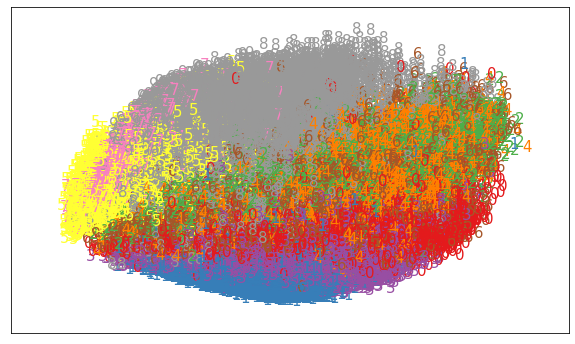

In [ ]:
# The input parameters are the PCA fit in X and the labels
plot_components(X_r,y_)

Resposta:

Pela figura podemos ver que uma compressão de 784D para 100D comprime relativamente bem os dados dando para notar a separação entre as classes.

4. (2 points) How many components are needed for a better evaluation of the model? Define the minimum and maximum components to be tested using the energies_number method. How can we evaluate this graph and the quantity that was defined as best for the problem?

In [ ]:
###Antes definimos uma função da CNN usada no exercicio anterior para facilitar o código
def cnn_model_pca(a):
  cnn_model=tf.keras.models.Sequential([
      Conv2D(8,3,activation="relu",input_shape=(a,a,1),padding='same'),
      MaxPooling2D(2,2,padding='same'),
      Conv2D(16,3,activation="relu", padding='same'),
      MaxPooling2D(2,2,padding='same'),
      Conv2D(32,3,activation="relu", padding='same'),
      MaxPooling2D(2,2,padding='same'),
      Flatten(),
      Dense(10,activation="softmax")
  ])
  
  cnn_model.compile(loss = loss_function ,optimizer = optimizer ,metrics = ['accuracy'])
  return cnn_model

In [ ]:
def energies_number(min, max, train):
  # Select a range of min and max number of dimensions, min/max.
  img_rows, img_cols = 28, 28
  num_classes = 10

  X_ = train.iloc[:,1:]/255
  y_ = train['label']
  y = keras.utils.to_categorical(y_, num_classes) 

  acc_list, pc_list = [], []
  for pc in range(min,max):
    root = math.sqrt(pc)
    #Check se existe raiz quadrado inteira para conseguir realizar o reshape e entrar a imagem na CNN
    if int(root + 0.5) ** 2 == pc:
      a = int(np.sqrt(pc))
      models = cnn_model_pca(a)

      # Run the PCA algorithm for dimensionality reduction.
      pca = PCA(n_components=pc)
      X = pca.fit(X_).transform(X_).reshape(60000,int(np.sqrt(pc)),int(np.sqrt(pc)),1)

      # Separa em treino e validação
      x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

      #Ajusta o modelo de CNN do exercicio anterior
      models.fit(x_train,y_train,batch_size = 128,epochs = 3,validation_data = (x_val,y_val))

      # Calculate the accuracy of the neural network using the reduced dimension by PCA
      acc = models.evaluate(x_val, y_val, verbose=0)[1]
      acc_list.append(acc)
      pc_list.append(pc)
  return acc_list, pc_list

###Original

In [ ]:
# Iteratively check how many principal components would be required in order to reach a reasonable accuracy with the same random neural network.

def energies_number(min, max, X):
    # Select a range of min and max number of dimensions, min/max.

    acc_list, pc_list = [], []
    for pc in range(min,max):
        pca = # Run the PCA algorithm for dimensionality reduction.
        acc = # Calculate the accuracy of the neural network using the reduced dimension by PCA
        acc_list.append(acc)
        pc_list.append(pc)
    return acc_list, pc_list

acc_list, pc_list = energies_number( #?, #? , #? )

In [ ]:
acc_list, pc_list = energies_number(1,600,train)

Epoch 1/3
315/315 [==============================] - 2s 5ms/step - loss: 1.9625 - accuracy: 0.2301 - val_loss: 1.7884 - val_accuracy: 0.2851
Epoch 2/3
315/315 [==============================] - 1s 5ms/step - loss: 1.7770 - accuracy: 0.2853 - val_loss: 1.7667 - val_accuracy: 0.3118
Epoch 3/3
315/315 [==============================] - 1s 5ms/step - loss: 1.7698 - accuracy: 0.2934 - val_loss: 1.7626 - val_accuracy: 0.3046
Epoch 1/3
315/315 [==============================] - 2s 6ms/step - loss: 1.4156 - accuracy: 0.4986 - val_loss: 0.9496 - val_accuracy: 0.6370
Epoch 2/3
315/315 [==============================] - 2s 5ms/step - loss: 0.9010 - accuracy: 0.6539 - val_loss: 0.8641 - val_accuracy: 0.6679
Epoch 3/3
315/315 [==============================] - 2s 5ms/step - loss: 0.8498 - accuracy: 0.6678 - val_loss: 0.8331 - val_accuracy: 0.6752
Epoch 1/3
315/315 [==============================] - 3s 7ms/step - loss: 1.2545 - accuracy: 0.5835 - val_loss: 0.7372 - val_accuracy: 0.7167
Epoch 2/3
315

In [ ]:
#acc_list, pc_list

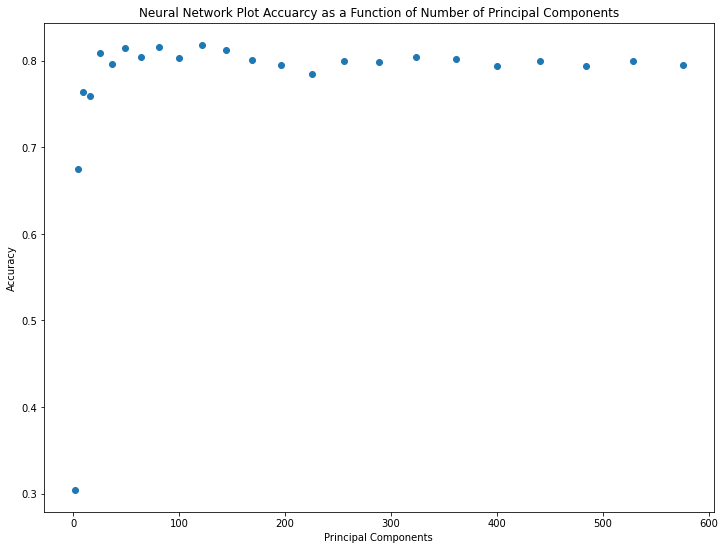

In [ ]:
plt.figure(figsize=[12,9])
plt.scatter(pc_list, acc_list)
plt.title('Neural Network Plot Accuarcy as a Function of Number of Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Accuracy');

In [ ]:
print('The maximum accuracy attained is ',np.max(acc_list),'% with ',pc_list[np.where(acc_list == np.max(acc_list))[0][0]],' principal components. Beyond this peak, additional principal components appear to mostly contribute noise.')

The maximum accuracy attained is  0.8184848427772522 % with  121  principal components. Beyond this peak, additional principal components appear to mostly contribute noise.


5. (3.5 points) Using Autoencoders: Re-do the first experiment (question 2) considering Autoencoders for reducing the image dimensionality. (3 points) Consider two different latent vector sizes for reducing the image dimensionality. (0.5 points) What are the conclusions when using Autoencoders in this problem? Does accuracy improve? 

Autoencoders are a branch of neural networks which attempt to compress the information of the input variables into a reduced dimensional space and then recreate the input data set. Typically the autoencoder is trained over some iterations using gradient descent, minimizing the mean squared error.
The key component is the “bottleneck” hidden layer. This is where the information from the input has been compressed. By extracting this layer from the model, each node can be treated as a variable in the same way each chosen principal component is used in the following models.

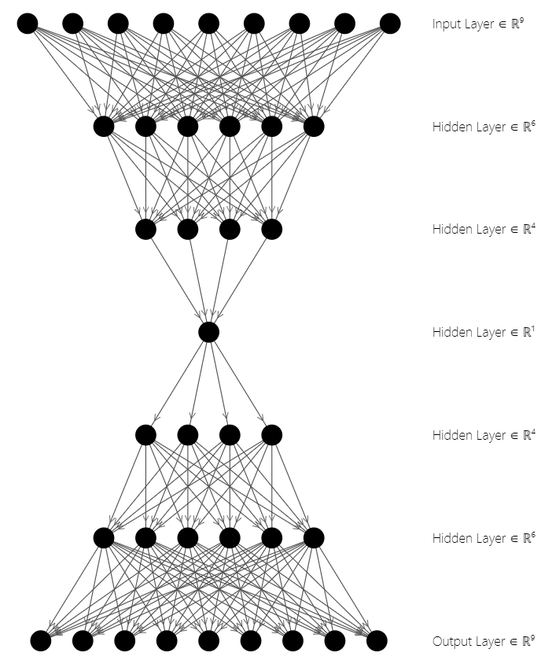

In [ ]:
# Create your AutoEncoder network architecture:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Conv2DTranspose, MaxPool2D,UpSampling2D

cnn_model=tf.keras.models.Sequential([
    Conv2D(8,3,activation="relu",input_shape=(28,28,1),padding='same'), ##28x28x8
    MaxPooling2D(2,2), ##14x14x8
    Conv2D(16,3,activation="relu", padding='same'), ##14x14x16
    MaxPooling2D(2,2), ##7x7x16
    Conv2D(32,3,activation="relu", padding='same') ##7x7x32
])

decoder_model=tf.keras.models.Sequential([
    Conv2D(16,3,activation="relu",padding='same', input_shape=(7,7,32)), ##7x7x16
    UpSampling2D((2,2)), ##14x14x16
    Conv2D(8,3,activation="relu", padding='same'), ##14x14x8
    UpSampling2D((2,2)),##28x28x8
    Conv2D(1,3,activation="sigmoid", padding='same')##28x28x1
])


In [ ]:
# Download Fashion-MNIST

train = pd.read_csv('/content/drive/MyDrive/Mestrado Unicamp/Trabalho_4/fashion-mnist-dataset/fashion-mnist_train.csv/fashion-mnist_train.csv')

num_classes = 10
x = train.iloc[:,1:]/255
y_ = train['label']
y = keras.utils.to_categorical(y_, num_classes)

x = x.values.reshape(60000,28,28,1)

#->
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.33, random_state=42)

x_train, y_train = x_train, y_train
x_val, y_val = x_val, y_val

In [ ]:
loss_function = 'categorial_crossentropy'
optimizer = 'adam'

In [ ]:
conv_ae = Sequential([cnn_model,decoder_model])
conv_ae.compile(loss = loss_function ,optimizer = optimizer ,metrics = ['accuracy'])

In [ ]:
conv_ae_fit = conv_ae.fit(x_train,x_train,batch_size = 128,epochs = 3,validation_data = (x_val,x_val))

Epoch 1/3
315/315 [==============================] - 60s 188ms/step - loss: 0.0000e+00 - accuracy: 0.5015 - val_loss: 0.0000e+00 - val_accuracy: 0.5017
Epoch 2/3
315/315 [==============================] - 55s 176ms/step - loss: 0.0000e+00 - accuracy: 0.5019 - val_loss: 0.0000e+00 - val_accuracy: 0.5017
Epoch 3/3
315/315 [==============================] - 56s 179ms/step - loss: 0.0000e+00 - accuracy: 0.5019 - val_loss: 0.0000e+00 - val_accuracy: 0.5017


In [ ]:
##Usamos o resultado do modelo para redimensionar o nosso X_train e utilizarmos no modelo de classificacao:

X_train_encode = conv_ae.predict(x_train)

1257/1257 [==============================] - 19s 15ms/step


In [ ]:
X_train_encode.shape

(40200, 28, 28, 1)

In [ ]:
# Re-do the first experiment (question 2) considering the autoencoder dimensionality reduction

# Usamos o resultado e passamos o nosso modelo de CNN do exercicio 2

#CNN model
model=tf.keras.models.Sequential([
    Conv2D(8,3,activation="relu",input_shape=(28,28,1), padding='same'),
    MaxPooling2D(2,2),
    Conv2D(16,3,activation="relu",padding='same'),
    MaxPooling2D(2,2),
    Conv2D(32,3,activation="relu", padding='same'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(10,activation="softmax")
])

model.compile(loss = loss_function ,optimizer = optimizer ,metrics = ['accuracy'])

# Train loop
history1 = model.fit(X_train_encode,y_train,batch_size = 128,epochs = 10,validation_data = (x_val,y_val))


Epoch 1/10
315/315 [==============================] - 22s 70ms/step - loss: 2.3027 - accuracy: 0.0996 - val_loss: 2.3115 - val_accuracy: 0.0938
Epoch 2/10
315/315 [==============================] - 24s 77ms/step - loss: 2.3027 - accuracy: 0.0996 - val_loss: 2.3115 - val_accuracy: 0.0882
Epoch 3/10
315/315 [==============================] - 23s 74ms/step - loss: 2.3027 - accuracy: 0.1006 - val_loss: 2.3115 - val_accuracy: 0.0878
Epoch 4/10
315/315 [==============================] - 24s 76ms/step - loss: 2.3026 - accuracy: 0.0986 - val_loss: 2.3114 - val_accuracy: 0.0908
Epoch 5/10
315/315 [==============================] - 24s 78ms/step - loss: 2.3027 - accuracy: 0.1011 - val_loss: 2.3116 - val_accuracy: 0.0857
Epoch 6/10
315/315 [==============================] - 24s 76ms/step - loss: 2.3027 - accuracy: 0.0999 - val_loss: 2.3117 - val_accuracy: 0.0858
Epoch 7/10
315/315 [==============================] - 22s 71ms/step - loss: 2.3026 - accuracy: 0.0983 - val_loss: 2.3117 - val_accuracy:

In [ ]:
# What are the conclusions when using Autoencoders in this problem? Does accuracy improve?

Resposta: Utilizando o autoenconder, a precisão piorou bastante, mas por conta da reconstrução da imagem estar acertando apenas 50%. O ideal seria treinar um modelo melhor para que conseguimos utilizar no lugar do PCA.

##**Autoencoder:** Vetor latente de 64 dimensões

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Conv2DTranspose, MaxPooling2D,UpSampling2D, Conv2D, Flatten, Dense

In [ ]:
#Dataset utilizado é o que se encontra no framework scikit-learn
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#garantindo que os pixels sejam de um mesmo tipo e Realizando a normalização das imagens
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#Validando que temos 60000 imagens de treino e 10.00 para teste, como requisitado
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)


In [ ]:
#Realizando o pré processamento aplicando a técnica do One-Hot Encoding
train_y_one_hot = tf.keras.utils.to_categorical(y_train)
test_y_one_hot = tf.keras.utils.to_categorical(y_test)

print('Label Original:', y_train[0])
print('Depois da conversão:', train_y_one_hot[0])

Label Original: 9
Depois da conversão: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
# Para não utilizar os dados de teste durante o treino, 
#separamos 20% dos dados de treino para validação

x_train, x_val, y_train, y_val = train_test_split(x_train, train_y_one_hot, test_size=0.2, random_state =42)

In [ ]:
print(f'x_train: {x_train.shape}\ny_train: {y_train.shape}\nx_val: {x_val.shape}\ny_val: {y_val.shape}')

x_train: (48000, 28, 28)
y_train: (48000, 10)
x_val: (12000, 28, 28)
y_val: (12000, 10)


In [ ]:
class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim   
        
        #Realizando a compressão dos dados
        self.encoder = tf.keras.Sequential([
          layers.Flatten(),
          layers.Dense(latent_dim, activation='relu'),
        ])
        
        self.decoder = tf.keras.Sequential([
          layers.Dense(784, activation='sigmoid'), #Camada densa de tamanho igual a imagem 28x28=784
          layers.Reshape((28, 28)) #redimenciona para se igualar a saída original  
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


    def analyse_result(self, origianl_data, num_sample=10):
        encoded_imgs = self.encoder(origianl_data).numpy()
        decoded_imgs = self.decoder(encoded_imgs).numpy()

        plt.figure(figsize=(20, 4))
        for i in range(num_sample):
          # display original
          ax = plt.subplot(2, num_sample, i + 1)
          plt.imshow(origianl_data[i])
          plt.title("original")
          plt.gray()
          ax.get_xaxis().set_visible(False)
          ax.get_yaxis().set_visible(False)

        for i in range(num_sample):
          # display reconstrução
          ax = plt.subplot(2, num_sample, i + 1 + num_sample)
          plt.imshow(decoded_imgs[i])
          plt.title("reconstructed")
          plt.gray()
          ax.get_xaxis().set_visible(False)
          ax.get_yaxis().set_visible(False)


    def plot_train_result(self, hist):
        plt.plot(hist.history['loss'])
        plt.plot(hist.history['val_loss'])
        plt.legend(['Training','Validation'])
        plt.title("Training And Validation Loss")
        plt.xlabel("Epochs")


    def __repr__(self):
        return f"Autoencoder(\nlatent_dim={self.latent_dim},\n encoder={self.encoder},\n decoder={self.decoder})"


In [ ]:
#Diminuindo a dimensão da imagem para 64
latent_dim = 64 

#Inicialização do modelo
autoencoder = Autoencoder(latent_dim)

#Compilando o modelo
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=losses.MeanSquaredError())

#Realizando o treinamento
hist = autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                
                validation_data=(x_val, x_val))

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0268 - val_loss: 0.0145
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0125 - val_loss: 0.0113
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0106 - val_loss: 0.0104
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0099 - val_loss: 0.0098
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0095 - val_loss: 0.0094
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0093 - val_loss: 0.0093
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0092 - val_loss: 0.0092
Epoch 8/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 9/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 10/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.008

In [ ]:
autoencoder.summary()

Model: "autoencoder_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (32, 64)                  50240     
                                                                 
 sequential_5 (Sequential)   (32, 28, 28)              50960     
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


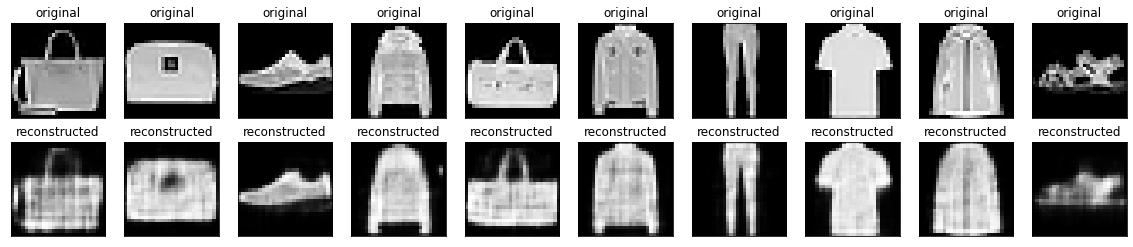

In [ ]:
#Analisar a imagem original com a gerada pelo modelo 
autoencoder.analyse_result(x_val)

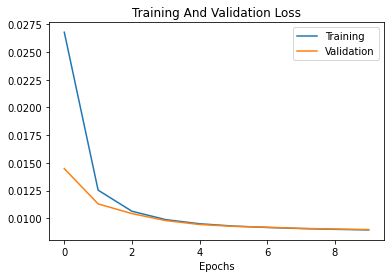

In [ ]:
#plotando os resultados de treinamento e validação
autoencoder.plot_train_result(hist)

In [ ]:
#Salvando o modelo treinado
autoencoder.save_weights('autoencoder.h5')

##**Autoencoder:** Vetor latente de 32 dimensões

In [ ]:
#Diminuindo a dimensão da imagem para 64
latent_dim = 32 

#Inicialização do modelo
autoencoder32 = Autoencoder(latent_dim)

#Compilando o modelo
autoencoder32.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=losses.MeanSquaredError())

#Realizando o treinamento
hist = autoencoder32.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_val, x_val))

NameError: ignored

In [ ]:
autoencoder32.summary()

In [ ]:
#Analisar a imagem original com a gerada pelo modelo 
autoencoder32.analyse_result(x_val)

In [ ]:
#plotando os resultados de treinamento e validação
autoencoder32.plot_train_result(hist)

In [ ]:
#Salvando o modelo treinado
autoencoder32.save_weights('autoencoder32.h5')

## Modelo de classificação utilizando o condensado gerado pelo autoencoder

Utilizaremos a saída gerada pelo modelo no momento do encode na entrada no nosso modelo CNN. Nesse momento utilizaremos 
o que o autoencoder aprendeu no momento de extração das features, ou seja a saída do momendo identificado no exemplo a baixo:

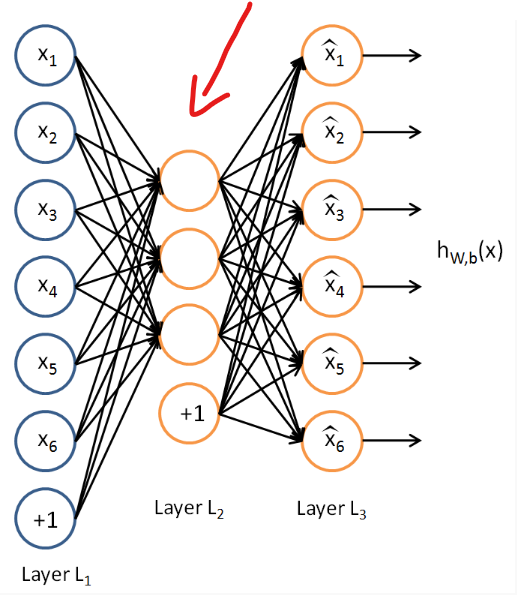

## Criando classificador utilizando autoencoder e cnn

In [ ]:
class Classifier(Model):

    def __init__(self, encoder):
        super(Classifier, self).__init__()
        self.encoder = encoder
        self.reshaped_train = Reshape((28,28,1))
        
        #classificador convolucional
        self.conv = tf.keras.layers.Conv2D(8,3, activation="relu", padding='same')
        self.max_pool_one = tf.keras.layers.MaxPooling2D(2,2)
        self.conv_two = Conv2D(16,3,activation="relu",padding='same')
        self.max_pool_two = tf.keras.layers.MaxPooling2D(2,2)
        self.conv_three = Conv2D(32,3,activation="relu", padding='same')
        self.max_pool_three = tf.keras.layers.MaxPooling2D(2,2)
        self.flat_two = tf.keras.layers.Flatten()
        self.out = tf.keras.layers.Dense(10, activation='softmax')

    def call(self, encoder):
        dense1 = self.reshaped_train(encoder)
        conv1 = self.conv(dense1)
        poll = self.max_pool_one(conv1)
        conv2 = self.conv_two(poll)
        poll2 = self.max_pool_two(conv2)
        conv3 = self.conv_three(poll2)
        poll3 = self.max_pool_three(conv3)
        flat2 = self.flat_two(poll3)

        return self.out(flat2)
    
    
    def plot_train_result(self, hist):
        plt.plot(hist.history['loss'])
        plt.plot(hist.history['val_loss'])
        plt.legend(['Training','Validation'])
        plt.title("Training And Validation Loss")
        plt.xlabel("Epochs")

In [ ]:
#Aplicando conceito de transfer learning. As duas primeiras camadas do modelo não serão treinadas

for layer in autoencoder.layers[:2]:
    layer.trainable = False

In [ ]:
#Retirando as últimas camadas do modelo autoencoder que fazer relação ao decoder, 
#pois precisaremos somente do modelo compilado

for layer in autoencoder.layers[2:]:
    layer.pop = False

In [ ]:
classifier = Classifier(autoencoder)
classifier.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
classify_train = classifier.fit(x_train, y_train, batch_size=62, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
775/775 [==============================] - 17s 22ms/step - loss: 0.6951 - accuracy: 0.7548 - val_loss: 0.5222 - val_accuracy: 0.8109
Epoch 2/10
775/775 [==============================] - 16s 21ms/step - loss: 0.4335 - accuracy: 0.8445 - val_loss: 0.4006 - val_accuracy: 0.8541
Epoch 3/10
775/775 [==============================] - 17s 21ms/step - loss: 0.3796 - accuracy: 0.8647 - val_loss: 0.3688 - val_accuracy: 0.8658
Epoch 4/10
775/775 [==============================] - 16s 20ms/step - loss: 0.3463 - accuracy: 0.8772 - val_loss: 0.3448 - val_accuracy: 0.8750
Epoch 5/10
775/775 [==============================] - 16s 21ms/step - loss: 0.3259 - accuracy: 0.8832 - val_loss: 0.3256 - val_accuracy: 0.8822
Epoch 6/10
775/775 [==============================] - 16s 20ms/step - loss: 0.3134 - accuracy: 0.8872 - val_loss: 0.3246 - val_accuracy: 0.8844
Epoch 7/10
775/775 [==============================] - 16s 20ms/step - loss: 0.2992 - accuracy: 0.8919 - val_loss: 0.3207 - val_accuracy:

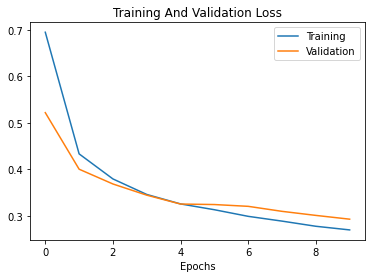

In [ ]:
classifier.plot_train_result(classify_train)

In [ ]:
classifier.save_weights('autoencoder_classification.h5')

In [ ]:
#Realizando a validação do modelo com o conjunto de validação
validation_eval = classifier.evaluate(x_val, y_val, verbose=0)
print(f'Perda: {validation_eval[0]}\nAcurácia: {validation_eval[1]}')

Perda: 0.30444225668907166
Acurácia: 0.890666663646698


## Criando classificador utilizando autoencoder32 e cnn

In [ ]:
#Aplicando conceito de transfer learning. As duas primeiras camadas do modelo não serão treinadas

for layer in autoencoder32.layers[:2]:
    layer.trainable = False

In [ ]:
#Retirando as últimas camadas do modelo autoencoder que fazer relação ao decoder, 
#pois precisaremos somente do modelo compilado

for layer in autoencoder32.layers[2:]:
    layer.pop = False

In [ ]:
classifier = Classifier(autoencoder32)
classifier.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
classify_train = classifier.fit(x_train, y_train, batch_size=62, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
775/775 [==============================] - 17s 21ms/step - loss: 0.6624 - accuracy: 0.7646 - val_loss: 0.4494 - val_accuracy: 0.8388
Epoch 2/10
775/775 [==============================] - 17s 22ms/step - loss: 0.4188 - accuracy: 0.8505 - val_loss: 0.3936 - val_accuracy: 0.8586
Epoch 3/10
775/775 [==============================] - 16s 21ms/step - loss: 0.3732 - accuracy: 0.8666 - val_loss: 0.3514 - val_accuracy: 0.8721
Epoch 4/10
775/775 [==============================] - 16s 21ms/step - loss: 0.3425 - accuracy: 0.8771 - val_loss: 0.3364 - val_accuracy: 0.8801
Epoch 5/10
775/775 [==============================] - 17s 22ms/step - loss: 0.3226 - accuracy: 0.8830 - val_loss: 0.3336 - val_accuracy: 0.8772
Epoch 6/10
775/775 [==============================] - 16s 21ms/step - loss: 0.3069 - accuracy: 0.8888 - val_loss: 0.3561 - val_accuracy: 0.8709
Epoch 7/10
775/775 [==============================] - 17s 21ms/step - loss: 0.2932 - accuracy: 0.8928 - val_loss: 0.3218 - val_accuracy:

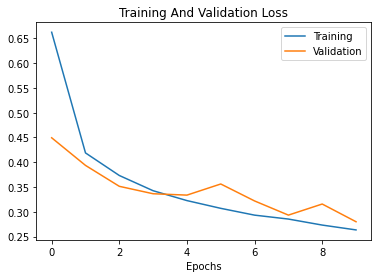

In [ ]:
classifier.plot_train_result(classify_train)

In [ ]:
classifier.save_weights('autoencoder_classification.h5')

#Realizando o validação do modelo 
validation_eval = classifier.evaluate(x_val, y_val, verbose=0)
print(f'Acurácia: {validation_eval[1]}')

Acurácia: 0.9010833501815796


#### **Conclusões**: Com relação ao tamanho das dimensões, o modelo com 32 dimensões, ou seja o menor , gerou um melhor resultado em termos de acurácia, mas analisando o gráfico quando apresentado ao conjunto de validação o modelo ainda possui picos de erros.

Ulizando um modelo mais simples de autoencoder conseguimos resultados melhores que quando aplicado com algumas camadas convolucionais. Talvez seja porque o problema seja relativamente mais simples e o modelo com CNN precise de mais técnicas para lidar com isso.

### Links:
https://www.tensorflow.org/tutorials/generative/autoencoder#load_the_dataset

http://ufldl.stanford.edu/tutorial/unsupervised/Autoencoders/

https://keras.io/api/models/model/#model-class

## Deadline

Monday, November 18, 11:59 pm. 

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you do, your grade will be penalized as follows:
- November 19, 11:59 pm : grade * 0.75
- November 20, 11:59 pm : grade * 0.5
- November 21, 11:59 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English).

**This activity is NOT individual, it must be done in pairs (two-person group).**